<a href="https://colab.research.google.com/github/audrb1999/ML-DL-Study/blob/main/%EB%B0%91%EB%94%A51/3.%EC%8B%A0%EA%B2%BD%EB%A7%9Dipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.신경망

- 앞장에서는 우리가 일일히 가중치를 수정해주었지만 신경망에서는 데이터로부터 가중치를 자동으로 학습합니다.


## 3.1 퍼셉트론에서 신경망으로

신경망과 퍼셉트론은 공통점이 많습니다. 이번 절에서는 다른 점을 중심으로 알아보겠습니다.


### 3.1.1 신경망의 예

다음 그림에서 가장 왼쪽 줄은 입력층, 그 다음 줄은 은닉층, 마지막 줄은 출력층이라고 합니다.

이 책에서는 입력층에서 출력층 방향으로 0층, 1층, 2층이라고 하겠습니다.

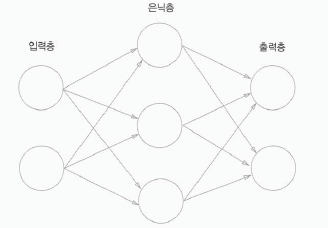

### 3.1.2 퍼셉트론과의 차이점

- 활성화 함수의 등장

퍼셉트론과 다르게 입력값과 가중치의 곱과 편향의 합을 활성화 함수에 넣어주는 과정을 거치게 됩니다.

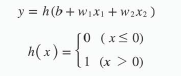

> 그림으로 표현한 예시

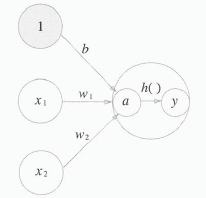

이때 출력물은 앞쪽의 행 shape과 뒤쪽의 열 shape을 따라가게 됩니다.

## 3.2 활성화 함수

### 3.2.1 시그모이드 함수

신경망에서 자주 쓰이는 활성화 함수 시그모이드 함수를 나타내는 식입니다.

$$h(x) = \frac 1 {1 + exp(-x)}$$

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # 이걸로는 그래프를 그릴 때 차원이 맞지 않음!


시그모이드 그래프 그려보기

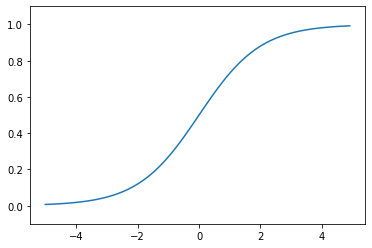

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

###3.2.2 계단 함수 구현하기


In [6]:
def step_function(x):
    if x>0:
        return 1
    else: return 0

# 조금 더 간결하게

def step_function(x):
    y = x>0
    return y.astype(np.int)

계단 함수의 그래프

이제 앞에서 정의한 계단 함수의 그래프를 그려봅시다.

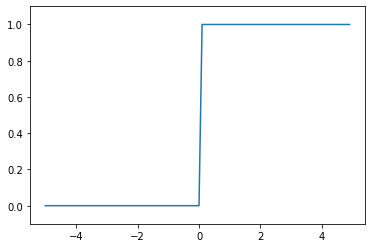

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    y = x>0
    return y.astype(np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.3 시그모이드 함수와 계단 함수 비교

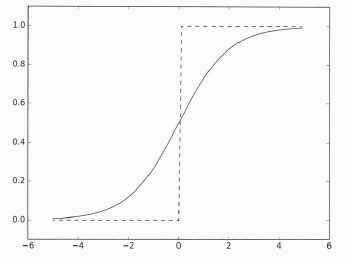

- 시그모이드는 연속적으로 변하는 반면 계단 함수는 0을 경계로 출력이 갑자기 바뀌어 버립니다. 

- 시그모이드 함수의 이 매끈함은 신경망 학습에서 아주 중요한 역할을 합니다.(미분이 가능!)

## 3.3 다차원 배열의 계산



딥러닝에서는 대량의 데이터를 사용하기 때문에 다차원 배열을 사용해야 됩니다.

2차원 배열은 행렬의 연산과 같은 연산 방식을 가집니다.

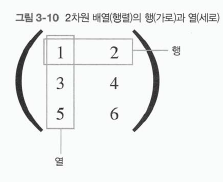

행렬의 내적(행렬 곱)의 방법은 1번째 행렬의 행과 2번째 행렬의 열을 원소끼리 곱해서 더하면 됩니다.

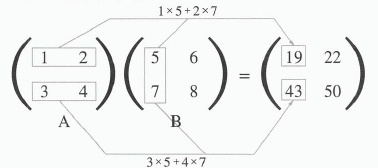

## 3.4 3층 신경망 구현하기

1층에서의 연산 과정

In [8]:
import numpy as np

x = np.array([1.0, 0.5])
w1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
b1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(x, w1) + b1

print(A1)

Z1 = sigmoid(A1) # 활성화 함수를 거침

print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


2층에서의 연산 과정

In [9]:
w2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
b2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, w2) + b2
Z2 = sigmoid(A2)

print(Z2)

[0.62624937 0.7710107 ]


3층에서의 연산 과정

In [10]:
w3 = np.array([[0.1, 0.3], [0.2, 0.4]])
b3 = np.array([0.1, 0.2])

Z3 = np.dot(Z1, w2) + b2


print(Z3)

[0.51615984 1.21402696]


구현 정리

In [11]:
def init_network():
    network = {} # 빈 딕셔너리에
    network['w1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['w2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['w3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network # 딕셔너리로 간편하게 부를 수 있음

def forward(network, x):
    w1, w2, w3 = network['w1'], network['w2'], network['w3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    z3 = np.dot(z2, w3) + b3

    return z3

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계하기

신경망은 분류와 회귀 모두에 이용할 수 있습니다. 다만 문제에 따라 출력층에서 사용하는 활성화 함수가 달라집니다. 회귀에서는 항등 함수를 분류에서는 소프트 맥스 함수를 사용합니다.

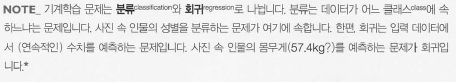

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

항등 함수는 입력과 출력이 같은 함수를 말합니다.

반면 분류에 사용하는 소프트맥스 함수는 전체에서 해당 비율을 구합니다.(지수 함수를 사용하여 확률적으로 볼 수 있게 만들어줌!)

- 소프트 맥스 출력의 총합은 1입니다.

$$y_k = \frac {exp(a_k)} {\Sigma^n_{i=1} exp(a_i)}$$


> 소프트맥스 함수는 모든 입력 신호로부터 영향을 받게됩니다.

In [12]:
import numpy as np

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y


- 소프트맥스 함수를 구현할 때 조심할 점

지수 함수는 쉽게 큰 값을 출력핪니다. 이렇게 아주 큰 값끼리 나눗셈을 하면 결과 수치가 불안정 해집니다.

> $e^{100} $은 0이 140개가 넘음

- 문제 해결 방안

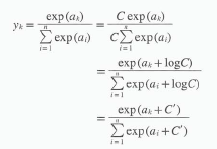

C라는 임의의 정수를 분자와 분모 양쪽에 곱했습니다.(로그에서 곱셈은 덧셈으로 변형 가능!)

여기서 C에는 오버플로를 막기 위해서 입력 신호 중 최대값을 넣습니다.

> 값 범위를 최대값으로 빼서 바꿉니다. 정규화 기법과 비슷해보입니다.

In [13]:
import numpy as np

def softmax(a):
    c = max(abs)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a - c)
    y = exp_a / sum_exp_a
    return y

## 3.6 손글씨 숫자 인식

In [14]:
# 케라스에서 데이터를 가져왔습니다.

import tensorflow as tf 
import numpy as np 
from tensorflow import keras

mnist = keras.datasets.mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [15]:
x_train.shape

(60000, 28, 28)

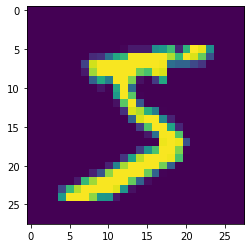

In [16]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.show()

# 책에서는 flatten을 진행했으므로

x_train_t = x_train.reshape(60000, 784)
y_train_t = y_train.reshape(60000, )
x_test_t = x_test.reshape(10000, 784)
y_test_t = y_test.reshape(10000, )


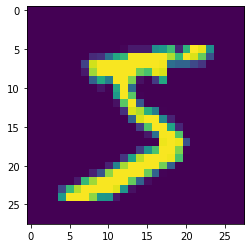

In [17]:
plt.imshow(x_train_t[0].reshape(28, 28))
plt.show()

본격적으로 데이터가 필요하기에 git clone을 하겠습니다.


In [18]:
!git clone 'https://github.com/audrb1999/deep-learning-from-scratch'

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 791, done.
remote: Total 791 (delta 0), reused 0 (delta 0), pack-reused 791
Receiving objects: 100% (791/791), 52.15 MiB | 44.32 MiB/s, done.
Resolving deltas: 100% (456/456), done.


In [20]:
import os
os.chdir('/content/deep-learning-from-scratch/ch03')
# 3장 내용은 ch03 디렉토리에 존재합니다

In [21]:
!dir

mnist_show.py		  README.md	     sigmoid.py
neuralnet_mnist_batch.py  relu.py	     sig_step_compare.py
neuralnet_mnist.py	  sample_weight.pkl  step_function.py


In [26]:
# 이번 챕터에 필요한 함수들을 가져옵니다.
from neuralnet_mnist import get_data, init_network, predict

x, t = get_data()# train, test set을 전달
network = init_network()# 저장된 가중치 값들을 불러오고

accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])# 순전파 진행
    p = np.argmax(y) # 가장 확률이 높은 예측의 인덱스를 가져와서
    if p == t[i]: # 비교하고 맞으면 accuracy_cnt에 +1를 진행
        accuracy_cnt += 1

print(f'Accuracy {float(accuracy_cnt)/ len(x)}')

Accuracy 0.9352


순전파를 진행할 때 행렬 연산이 이루어지므로 이때 알맞게 연산이 될 수 있도록 shape을 조절해줘야 합니다!

미니 배치를 적용하여 다시 예측해봅시다.

In [27]:
# 이번 챕터에 필요한 함수들을 가져옵니다.
from neuralnet_mnist import get_data, init_network, predict

x, t = get_data()# train, test set을 전달
network = init_network()# 저장된 가중치 값들을 불러오고

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1) # 가장 확률이 높은 예측의 열 인덱스를 가져와서
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print(f'Accuracy {float(accuracy_cnt)/ len(x)}')

Accuracy 0.9352


- 이번장 정리

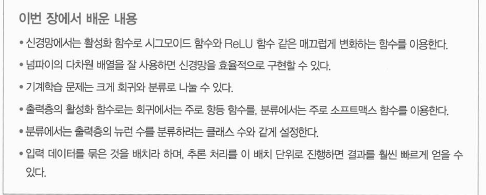